In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings

In [5]:
warnings.filterwarnings('ignore')

In [6]:
from sklearn.naive_bayes import MultinomialNB

In [7]:
from sklearn.multiclass import OneVsRestClassifier

In [8]:
from sklearn import metrics

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn import metrics

In [13]:
resumeDataSet = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad...",


In [56]:
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())
print(len(resumeDataSet['Category'].unique()))

Displaying the distinct categories of resume -
[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]
25


In [15]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               14
Database                     11
HR                           11
Data Science                 10
Advocate                     10
Hadoop                        7
DevOps Engineer               7
DotNet Developer              7
Automation Testing            7
Testing                       7
Python Developer              6
Civil Engineer                6
Arts                          6
Health and fitness            6
SAP Developer                 6
Business Analyst              6
Mechanical Engineer           5
Network Security Engineer     5
Electrical Engineering        5
ETL Developer                 5
Web Designing                 5
Blockchain                    5
Sales                         5
Operations Manager            4
PMO                           3
Name: Category, dtype: int64


In [16]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Category'>

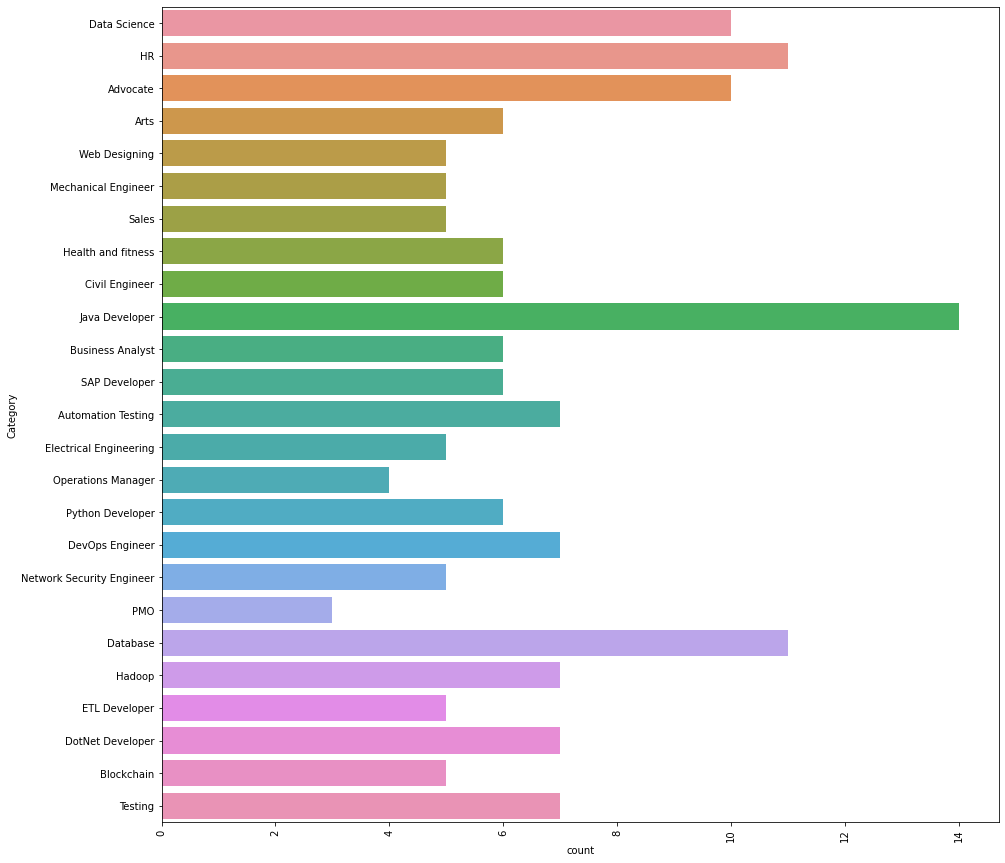

In [17]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

In [18]:
from matplotlib.gridspec import GridSpec

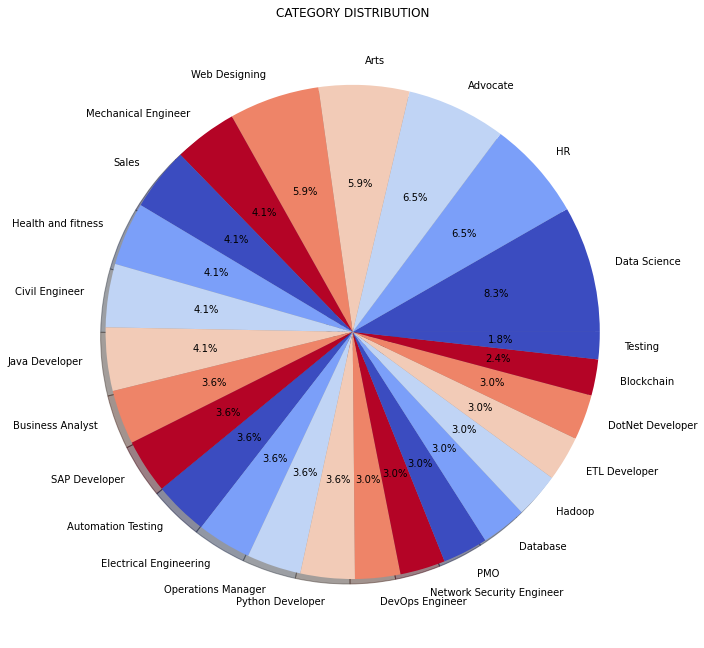

In [19]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 6)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [20]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [32]:
print(resumeDataSet.loc[0].cleaned_resume)

Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance AssociateData Science Assurance Associate Ernst Young LLPSkill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the rev

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\Akhmad
[nltk_data]     Roziqin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akhmad
[nltk_data]     Roziqin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('Exprience', 601), ('months', 499), ('company', 496), ('Details', 490), ('description', 436), ('1', 345), ('Project', 288), ('data', 243), ('project', 234), ('year', 218), ('SQL', 212), ('6', 209), ('Maharashtra', 205), ('team', 203), ('Less', 203), ('using', 195), ('January', 173), ('Management', 160), ('Pune', 147), ('C', 142), ('Education', 136), ('Ltd', 136), ('management', 135), ('database', 132), ('Data', 125), ('monthsCompany', 121), ('Engineering', 121), ('Server', 121), ('Database', 117), ('India', 117), ('like', 117), ('The', 116), ('various', 115), ('Pvt', 115), ('business', 114), ('application', 114), ('Responsibilities', 113), ('development', 112), ('System', 110), ('reports', 109), ('2', 109), ('A', 108), ('Java', 106), ('issues', 104), ('requirements', 104), ('Mumbai', 101), ('work', 98), ('system', 96), ('Role', 96), ('Test', 96)]


AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [33]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(135, 1500)
(34, 1500)


In [37]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set: 0.79

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         4
          11       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         2
          14       1.00      0.67      0.80         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      0.50      0.

In [39]:
from PIL import Image
import pytesseract 

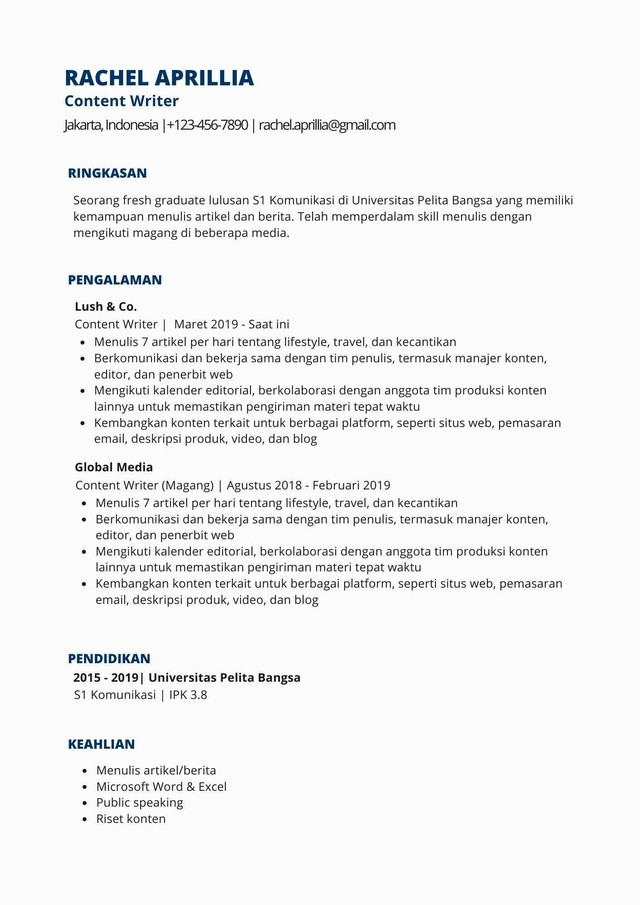

In [40]:
img_path = 'cv-sample-1.png'
img = Image.open(img_path)
img 

In [41]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [42]:
text = pytesseract.image_to_string(img)
print(text)

RACHEL APRILLIA
Content Writer
Jekarta, Indonesia | #123-456-7890 | rachelaprilia@gmailcom,

Seorang fresh graduate lulusan $1 Komunikasi di Universitas Pelita Bangsa yang memiliki
kemampuan menulis artikel dan berita. Telah memperdalam skill menulis dengan
‘mengikuti magang di beberapa media.

PENGALAMAN

Lush & Co.

Content Writer | Maret 2019 - Saat ini

‘+ Menulis 7 artikel per hari tentang lifestyle, travel, dan kecantikan

‘+ Berkomunikasi dan bekerja sama dengan tim penulis, termasuk manajer konten,
editor, dan penerbit web

‘+ Mengikuti kalender editorial, berkolaborasi dengan anggota tim produksi konten
lainnya untuk memastikan pengiriman materi tepat waktu

‘+ Kembangkan konten terkait untuk berbagai platform, seperti situs web, pemasaran
email, deskripsi produk, video, dan blog

Global Media
Content Writer (Magang) | Agustus 2018 - Februari 2019
‘+ Menulis 7 artikel per hari tentang lifestyle, travel, dan kecantikan
‘+ Berkomunikasi dan bekerja sama dengan tim penulis, terma

In [44]:
cleaned = cleanResume(text)
cleaned 

'RACHEL APRILLIA Content Writer Jekarta Indonesia rachelaprilia Seorang fresh graduate lulusan 1 Komunikasi di Universitas Pelita Bangsa yang memiliki kemampuan menulis artikel dan berita Telah memperdalam skill menulis dengan mengikuti magang di beberapa media PENGALAMAN Lush Co Content Writer Maret 2019 Saat ini Menulis 7 artikel per hari tentang lifestyle travel dan kecantikan Berkomunikasi dan bekerja sama dengan tim penulis termasuk manajer konten editor dan penerbit web Mengikuti kalender editorial berkolaborasi dengan anggota tim produksi konten lainnya untuk memastikan pengiriman materi tepat waktu Kembangkan konten terkait untuk berbagai platform seperti situs web pemasaran email deskripsi produk video dan blog Global Media Content Writer Magang Agustus 2018 Februari 2019 Menulis 7 artikel per hari tentang lifestyle travel dan kecantikan Berkomunikasi dan bekerja sama dengan tim penulis termasuk manajer konten editor dan penerbit web Mengikuti kalender editorial berkolaborasi 

In [55]:
resumeDataSet

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
164,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
165,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
166,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
167,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [49]:
feature = word_vectorizer.transform([cleaned])

In [50]:
feature

<1x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [53]:
prediksi = clf.predict(feature)
prediksi

array([3])

In [54]:
le.inverse_transform(prediksi)

array(['Blockchain'], dtype=object)